<a href="https://colab.research.google.com/github/suyashss/nn_test/blob/master/BEE-GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import tensorflow.keras as keras

In [179]:
tf.version

<module 'tensorflow_core._api.v2.version' from '/tensorflow-2.1.0/python3.6/tensorflow_core/_api/v2/version/__init__.py'>

In [0]:
import matplotlib.pyplot as plt
def display_images(images,n):
  #print(images.shape)
  fig = plt.figure(figsize=(n*1.5,3))
  for i in range(n):
    img = images[i,:,:]
    plt.subplot(1,n,i+1)
    plt.imshow(img,cmap="binary")
    plt.axis("off")
  plt.show()    

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving honey-bee-annotated-images.zip to honey-bee-annotated-images.zip
User uploaded file "honey-bee-annotated-images.zip" with length 52950294 bytes


In [7]:
!unzip honey-bee-annotated-images.zip

Archive:  honey-bee-annotated-images.zip
  inflating: bee_data.csv            
  inflating: bee_imgs/bee_imgs/001_043.png  
  inflating: bee_imgs/bee_imgs/001_044.png  
  inflating: bee_imgs/bee_imgs/001_046.png  
  inflating: bee_imgs/bee_imgs/001_047.png  
  inflating: bee_imgs/bee_imgs/001_050.png  
  inflating: bee_imgs/bee_imgs/001_051.png  
  inflating: bee_imgs/bee_imgs/001_054.png  
  inflating: bee_imgs/bee_imgs/001_056.png  
  inflating: bee_imgs/bee_imgs/001_078.png  
  inflating: bee_imgs/bee_imgs/001_082.png  
  inflating: bee_imgs/bee_imgs/001_083.png  
  inflating: bee_imgs/bee_imgs/001_085.png  
  inflating: bee_imgs/bee_imgs/001_091.png  
  inflating: bee_imgs/bee_imgs/001_092.png  
  inflating: bee_imgs/bee_imgs/001_093.png  
  inflating: bee_imgs/bee_imgs/001_094.png  
  inflating: bee_imgs/bee_imgs/001_095.png  
  inflating: bee_imgs/bee_imgs/001_096.png  
  inflating: bee_imgs/bee_imgs/001_097.png  
  inflating: bee_imgs/bee_imgs/001_118.png  
  inflating: bee_imgs

In [0]:
img_test = keras.preprocessing.image.load_img('bee_imgs/bee_imgs/046_197.png')

In [19]:
#%matplotlib inline
img_test.size

(44, 53)

In [0]:
img_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True)

In [255]:
train_generator = img_gen.flow_from_directory(
          './bee_imgs/', target_size=(30, 30),
      batch_size=12,color_mode='grayscale',)

Found 5172 images belonging to 1 classes.


In [233]:
5172 % 12

0

In [0]:
(x_train,y_train)= train_generator.next()

In [76]:
x_train.shape,y_train.shape

((32, 30, 30, 1), (32, 1))

In [37]:
x_train[1,2,3,:]

array([0.26666668], dtype=float32)

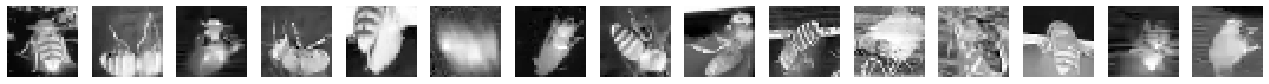

In [180]:
display_images(x_train.squeeze(),15)

In [0]:
type(x_train[0,0][0])

numpy.float32

In [91]:
x_train.shape

(32, 30, 30, 1)

In [0]:
import numpy as np

In [0]:
batch_size=12

In [0]:
codings_size = 60

In [0]:
generator = keras.models.Sequential([
                                     keras.layers.Dense(100,activation="selu",input_shape=[codings_size]),
                                     keras.layers.Dense(150,activation="selu"),
                                     keras.layers.Dense(150,activation="selu"),
                                     keras.layers.Dense(30*30,activation="sigmoid"),
                                     keras.layers.Reshape([30,30,1])
])

In [259]:
tgen = generator(tf.random.normal(shape=[batch_size,codings_size]))
print(tgen.shape)

(12, 30, 30, 1)


In [0]:
discriminator = keras.models.Sequential([keras.layers.Conv2D(64,input_shape=[30,30,1],kernel_size=(2,2),strides=2,),
                                         keras.layers.Flatten(),
                                          keras.layers.Dense(150,activation="selu"),
                                      keras.layers.Dense(100,activation="selu"),
                                      keras.layers.Dense(1,activation="sigmoid"),
])

In [0]:
gan = keras.models.Sequential([generator,discriminator])

In [0]:
discriminator.compile(loss="binary_crossentropy",optimizer=tf.optimizers.Adam(learning_rate=5e-5))
discriminator.trainable = False
gan.compile(loss="binary_crossentropy",optimizer=tf.optimizers.Adam(learning_rate=1e-4))

In [0]:
def train_gan(gan,dataset,batch_size,codings_size,n_epochs=50):
  generator,discriminator = gan.layers
  for epoch in range(n_epochs):
    (X_batch,y_batch) = train_generator.next()
    #print("Shape is",X_batch.shape)
    # Train discriminator
    noise = tf.random.normal(shape=[batch_size,codings_size])
    generated_images = generator(noise)
    if (epoch+1) % 1000 == 0:
      print("Epoch is",epoch+1,"GAN loss is",loss,"Discriminator loss is",disc_loss)
      display_images(tf.squeeze(generated_images),12)
    X_fake_and_real = tf.concat([generated_images,X_batch],axis=0)
    y1 = tf.constant([[0.1]]*batch_size + [[0.9]]*batch_size)
    discriminator.trainable = True
    disc_loss = discriminator.train_on_batch(X_fake_and_real,y1)
    # Train the generator
    noise = tf.random.normal(shape=[batch_size,codings_size])
    y2 = tf.constant([[0.9]]*batch_size)
    discriminator.trainable = False
    loss = gan.train_on_batch(noise,y2)

Epoch is 1000 GAN loss is 0.78689796 Discriminator loss is 0.6534362


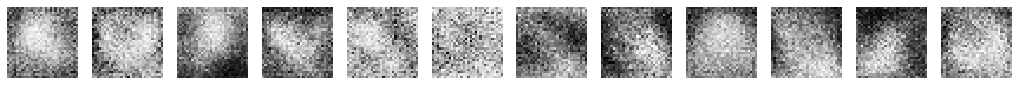

Epoch is 2000 GAN loss is 0.76862717 Discriminator loss is 0.69035774


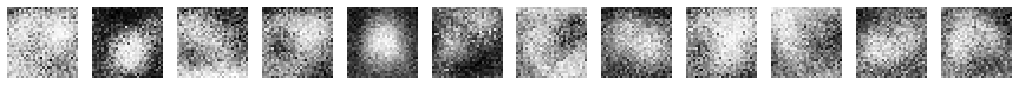

Epoch is 3000 GAN loss is 0.9468432 Discriminator loss is 0.6115132


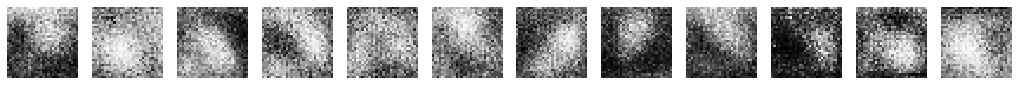

Epoch is 4000 GAN loss is 0.90061194 Discriminator loss is 0.70936793


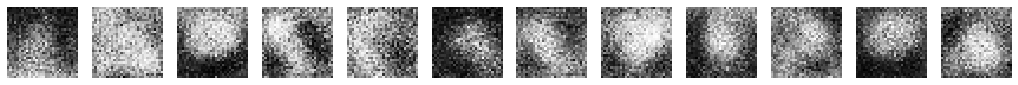

Epoch is 5000 GAN loss is 0.83441085 Discriminator loss is 0.55378187


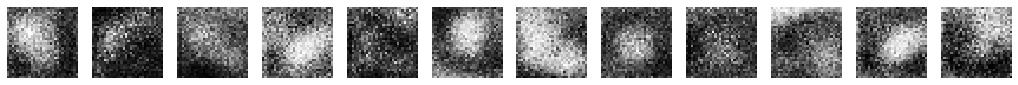

Epoch is 6000 GAN loss is 0.8316818 Discriminator loss is 0.6198494


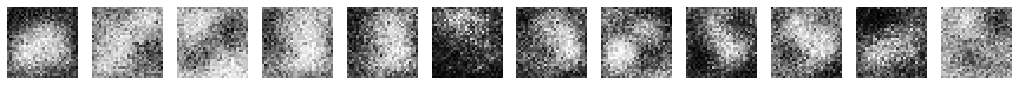

Epoch is 7000 GAN loss is 0.7948063 Discriminator loss is 0.70962065


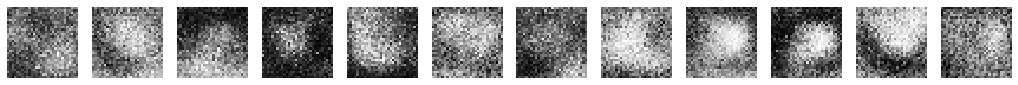

Epoch is 8000 GAN loss is 0.7704857 Discriminator loss is 0.67971975


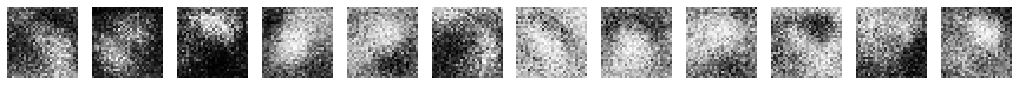

KeyboardInterrupt: ignored

In [323]:
train_gan(gan,dataset,batch_size,codings_size,10000)